In [18]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
df=pd.read_csv("HousingData.csv")

In [20]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [21]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
111,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6,432,17.8,395.59,10.16,22.8
431,10.06230,0.0,18.10,0.0,0.584,6.833,94.3,2.0882,24,666,20.2,81.33,19.69,14.1
192,NaN,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87,36.4
26,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4,307,21.0,376.88,14.81,16.6
240,0.11329,30.0,4.93,NaN,0.428,6.897,54.3,6.3361,6,300,16.6,391.25,11.38,22.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [23]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [24]:
df.shape

(506, 14)

In [25]:
df.fillna(df.mean(), inplace=True)

In [26]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [27]:
df.shape

(506, 14)

<Axes: >

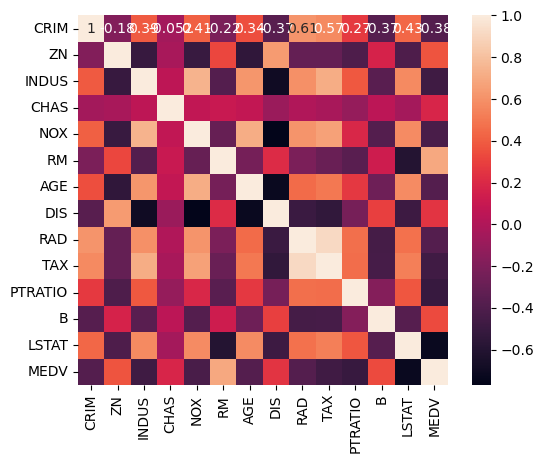

In [28]:
sns.heatmap(df.corr(),annot=True,square=True)

In [30]:
X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [32]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [47]:
from keras.models import Sequential
from keras.layers import Dense

In [48]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(13,)),
    Dense(32, activation='relu'),
    Dense(1)  
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.05)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 518.2770 - mae: 21.1774 - val_loss: 674.1047 - val_mae: 23.3798
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 496.7505 - mae: 20.5636 - val_loss: 624.3684 - val_mae: 22.3185
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 439.6544 - mae: 19.2971 - val_loss: 563.4724 - val_mae: 20.9517
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 381.8884 - mae: 17.7180 - val_loss: 484.0989 - val_mae: 19.0558
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 289.0595 - mae: 15.3189 - val_loss: 390.4744 - val_mae: 16.5724
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 240.2190 - mae: 13.4696 - val_loss: 295.2244 - val_mae: 13.8119
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 139.4789 - mae: 9.8906 - val_loss: 217.6364 - val_mae: 11.1320
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 82.1966 - mae: 7.1416 - val_loss: 170.0610 - val_mae: 8.8987
Epoch 9/50
12/12 ━━━━━━━━

In [50]:
loss,mae=model.evaluate(x_test,y_test,verbose=0)
print(f"Mean Squared Error",loss)
print(f"Mean Absolute Error", mae)

Mean Squared Error 24.075786590576172
Mean Absolute Error 3.218113899230957


In [51]:
predictions = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [52]:
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: ",rmse)
# Compute R² Score
r2 = r2_score(y_test, predictions)
print(f"R2 Score : ",r2)

RMSE:  4.906708429627271
R2 Score :  0.7584880507582404


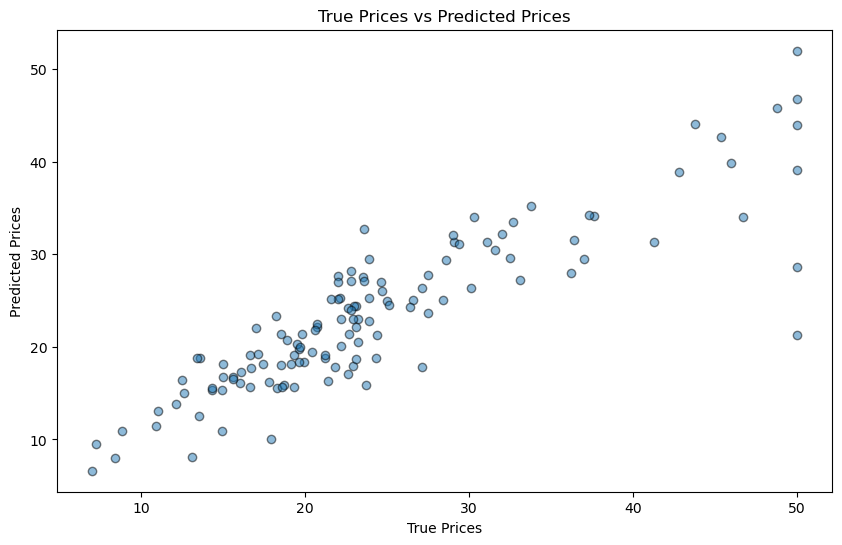

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions,alpha=0.5, edgecolors='k')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True Prices vs Predicted Prices")
plt.show()